In [1]:
from copy import copy
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def OTSUThreshold(original_img):
    img = copy.deepcopy(original_img)
    h,w = img.shape
    H = [0 for i in range(256)]
    for i in range(0,h):
        for j in range(0,w):
            H[img[i][j]]+=1
            
    mean,count = 0,0
    for i in range(0,256):
        mean+=i*H[i]
        count+=1
    mean/=count
    Threshold,Maximum = 0,0
    for T in range(1,255):
        mum = 0
        m1,m2,count1,count2 = 1,1,0,0
        for i in range(0,256):
            if i<T:
                m1+=H[i]
                count1+=i*H[i]
            else: 
                m2+=H[i]
                count2+=i*H[i]
        count1/=m1
        count2/=m2
        m1/=count
        m2/=count
        mum = m1*m2*(count1-count2)**2
        if mum>=Maximum:
            Maximum = mum
            Threshold = T
    
    for i in range(0,h):
        for j in range(0,w):
            if img[i][j]<=Threshold: img[i][j]=0
            else : img[i][j]=255
    return img

In [4]:
def IterativeThreshold(original_img):
    img = copy.deepcopy(original_img)
    h,w = img.shape
    T,E = 0,150
    while abs(T - E)>1:
        T = E
        T1,count1,T2,count2 = 0,0,0,0
        for i in range(0,h):
            for j in range(0,w):
                if img[i][j]<=T:
                    T1 +=img[i][j]
                    count1+=1
                else : 
                    T2 +=img[i][j]
                    count2+=1
        E = (T1/count1 + T2/count2)/2

    print(T)
    
    for i in range(0,h):
         for j in range(0,w):
            if img[i][j]<=T: img[i][j]=0
            else : img[i][j]=255
    return img

139.29446625110046


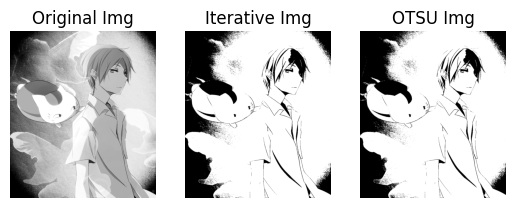

In [5]:
if __name__ == "__main__":
    image_path = r"1.png"  #图片路径
    #读取图像
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgIterativeThreshold = IterativeThreshold(img)
    imgOTSUThreshold = OTSUThreshold(img)
    
    sub = plt.subplot(1,3,1)
    plt.axis('off')
    sub.set_title("Original Img")
    plt.imshow(img,cmap='gray')
    
    sub = plt.subplot(1,3,2)
    plt.axis('off')
    sub.set_title("Iterative Img")
    plt.imshow(imgIterativeThreshold,cmap='gray')
    
    sub = plt.subplot(1,3,3)
    plt.axis('off')
    sub.set_title("OTSU Img")
    plt.imshow(imgOTSUThreshold,cmap='gray')